In [1]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import autocorrelation_plot

In [2]:
from sklearn import linear_model
from sklearn.utils import shuffle
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import BayesianRidge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
file = "data/GlobalTemperatures.csv"
out = pd.read_csv(file, parse_dates=True, index_col=0)
out.head()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
dt,,,,,,,,
1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
out.describe()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
count,3180.000000,3180.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000
mean,8.374731,0.938468,14.350601,0.479782,2.743595,0.431849,15.212566,0.128532
std,4.381310,1.096440,4.309579,0.583203,4.155835,0.445838,1.274093,0.073587
min,-2.080000,0.034000,5.900000,0.044000,-5.407000,0.045000,12.475000,0.042000
25%,4.312000,0.186750,10.212000,0.142000,-1.334500,0.155000,14.047000,0.063000
50%,8.610500,0.392000,14.760000,0.252000,2.949500,0.279000,15.251000,0.122000
75%,12.548250,1.419250,18.451500,0.539000,6.778750,0.458250,16.396250,0.151000
max,19.021000,7.880000,21.320000,4.373000,9.715000,3.498000,17.611000,0.457000


In [5]:
out.shape

(3192, 8)

# City

In [6]:
file = "data/GlobalLandTemperaturesByCity.csv"
city = pd.read_csv(file, parse_dates=True, index_col=0)
city.head()

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
dt,,,,,,
1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [7]:
city.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,8.235082e+06,8.235082e+06
mean,1.672743e+01,1.028575e+00
std,1.035344e+01,1.129733e+00
min,-4.270400e+01,3.400000e-02
25%,1.029900e+01,3.370000e-01
50%,1.883100e+01,5.910000e-01
75%,2.521000e+01,1.349000e+00
max,3.965100e+01,1.539600e+01


In [8]:
city.shape

(8599212, 6)

# Country

In [9]:
file = "data/GlobalLandTemperaturesByCountry.csv"
out = pd.read_csv(file, parse_dates=True, index_col=0)

In [10]:
out.head()

,AverageTemperature,AverageTemperatureUncertainty,Country
dt,,,
1743-11-01,4.384,2.294,Åland
1743-12-01,NaN,NaN,Åland
1744-01-01,NaN,NaN,Åland
1744-02-01,NaN,NaN,Åland
1744-03-01,NaN,NaN,Åland


In [11]:
out.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,544811.000000,545550.000000
mean,17.193354,1.019057
std,10.953966,1.201930
min,-37.658000,0.052000
25%,10.025000,0.323000
50%,20.901000,0.571000
75%,25.814000,1.206000
max,38.842000,15.003000


In [12]:
out = out.loc[out['Country'] == 'Bangladesh']
#out = out.loc[out['City'] == 'Sydney']
out = out.loc[out.index.year > 1909]

In [13]:
out.head()

,AverageTemperature,AverageTemperatureUncertainty,Country
dt,,,
1910-01-01,17.124,0.477,Bangladesh
1910-02-01,19.763,0.405,Bangladesh
1910-03-01,24.372,0.353,Bangladesh
1910-04-01,27.307,0.365,Bangladesh
1910-05-01,27.975,0.213,Bangladesh


# Cleanning

In [14]:
out.isnull().sum()

AverageTemperature               1
AverageTemperatureUncertainty    1
Country                          0
dtype: int64

In [15]:
print('Null Values:\n', out.isnull().sum())
    
# fill empty data columns with median - no! this is wrong for for older dates
# need to either use previous, or average of X rows
#out.loc[:,"AverageTemperature"] = out["AverageTemperature"].fillna(out["AverageTemperature"].median())
#out.loc[:,"AverageTemperatureUncertainty"] = out["AverageTemperatureUncertainty"].fillna(out["AverageTemperatureUncertainty"].median())

# alternative use bfill (back fill) or ffill (forward)
out = out.ffill()

# check data fill - should all be 0
print('Null Values fixed:\n', out.isnull().sum())


# drop unnecessary columns: country, uncertainty
out = out.drop('AverageTemperatureUncertainty', 1)
out = out.drop('Country', 1)

# add year column instead of dt
#out['dt'] = pd.to_datetime(out['dt'])
#out['year'] = out['dt'].map(lambda x: x.year)
#out['Year'] = out.index.year
out['Year'] = out.index.year + ((out.index.month-1)/12) # convert year to decimal
#print(out['Year'])
out['Month'] = out.index.month
out['Days delta'] = (out.index -  out.index[0]).days
#0=summer,1=autumn,2=winter,3=spring
out['Season'] = [1 if month >= 3 and month <= 5 else 2 if month >= 6 and month <= 8 else 3 if month >= 9 and month <= 11 else 0 for month in out['Month']]

# what about adding a seasonal delta? eg subtract the seasonal average from the yearly average?
#out_yearly_mean = out.resample('A').mean()
ma = out.rolling(window=12).mean()
out['MA'] = ma['AverageTemperature']
out['Season offset'] = out['AverageTemperature'] - ma['AverageTemperature']

Null Values:
 AverageTemperature               1
AverageTemperatureUncertainty    1
Country                          0
dtype: int64
Null Values fixed:
 AverageTemperature               0
AverageTemperatureUncertainty    0
Country                          0
dtype: int64


In [16]:
out.head()

,AverageTemperature,Year,Month,Days delta,Season,MA,Season offset
dt,,,,,,,
1910-01-01,17.124,1910.000000,1,0,0,NaN,NaN
1910-02-01,19.763,1910.083333,2,31,0,NaN,NaN
1910-03-01,24.372,1910.166667,3,59,1,NaN,NaN
1910-04-01,27.307,1910.250000,4,90,1,NaN,NaN
1910-05-01,27.975,1910.333333,5,120,1,NaN,NaN


In [17]:
print(out['AverageTemperature'].describe())
print(out['AverageTemperature'].shape)
out['AverageTemperature'].shape
#print(out['AverageTemperature'].value_counts())
#print(out['AverageTemperature'].value_counts(normalize = True))

# save subset
out.to_csv('data/BangladeshLandTemperatures.csv')

# resampling: http://benalexkeen.com/resampling-time-series-data-with-pandas/
# reduce the rows - by averaging fo rthe graph
out_years = out.resample('A').mean()
#out_quarters = out.resample('Q').mean()
#out_quarters = out.resample('Q', how=['mean', np.min, np.max])
#out_years = out.resample('A', how=['mean', 'min', 'max'])
#out_years_10 = out.resample('10A', how=['mean', 'min', 'max'])
out_years_10 = out.resample('10A').mean()


count    1245.000000
mean       25.127780
std         3.770678
min        16.457000
25%        22.145000
50%        27.005000
75%        28.145000
max        29.794000
Name: AverageTemperature, dtype: float64
(1245,)


In [18]:
doSeasonal = False
if doSeasonal:
    # seasonal trends: http://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/ 
    seasonal_data = out[:24] # 12 months * 2 years
    sx = seasonal_data.index
    #out["Year"].values
    #.reshape(-1,1)
    #print("sx: ", sx)
    sy = seasonal_data['AverageTemperature'].values
    #print("sy: ", sy)
    seasonal_series = pd.Series(sy, index=sx)
    print("sd: ", seasonal_series)
    print("sd: ", seasonal_series.describe())
    seasonal_result = seasonal_decompose(seasonal_series, model='additive')
    #, freq=1)
    f = plt.figure()
    f = seasonal_result.plot()
    #plt.plot(seasonal_result)
    f.savefig("test-seasonal-plot.png")
    print("Seasonal resid: " , seasonal_result.resid)
    print("Seasonal s: " , seasonal_result.seasonal)
    print("Seasonal trend: " , seasonal_result.trend)


In [18]:
print("SD: ", out_years["AverageTemperature"].std())
print("SD: ", out_years_10["AverageTemperature"].std())

SD:  0.33503300557782756
SD:  0.3138662235866413


Accuracy:  0.0038970502187856133
Coefficients:  [0.00785625]
Mean squared error:  14.15122501616779
Prediction 1917:  [24.77555783]
Prediction 2017:  [25.56118331]
Prediction 2117:  [26.3468088]
SVR Accuracy:  -0.22911743899773485
SVR Prediction 1917:  [26.887879]
SVR Prediction 2017:  [34.69672094]
SVR Prediction 2017b:  [33.26032451]
SVR Prediction 2018:  [31.6362509]
SVR Prediction 2018b:  [30.08948284]
SVR Prediction 2117:  [26.15178264]
Accuracy:  0.003897073692807118
Prediction 1917:  [24.77481222]
Prediction 2017:  [25.55974416]
Prediction 2117:  [26.33127075]
Prediction 2017 summer:  [25.55974416]
Prediction 2017 winter:  [25.56363514]
raw.png
Accuracy:  0.490351844880923
Coefficients:  [0.00777769]
Mean squared error:  0.05665647215234087
Prediction 1917:  [24.78085075]
Prediction 2017:  [25.55861969]
Prediction 2117:  [26.33638864]
SVR Accuracy:  0.8622485332244817
SVR Prediction 1917:  [24.61686335]
SVR Prediction 2017:  [26.53460886]
SVR Prediction 2017b:  [26.13909033]
SVR

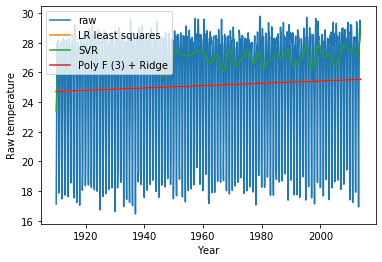

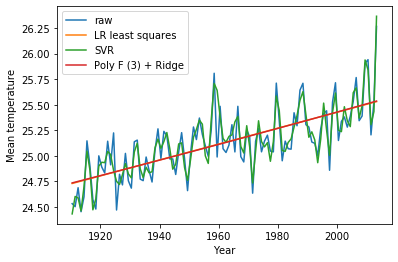

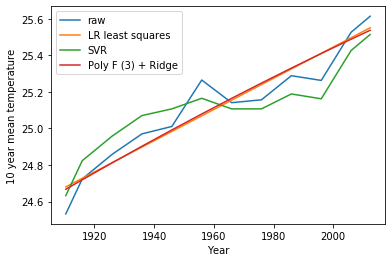

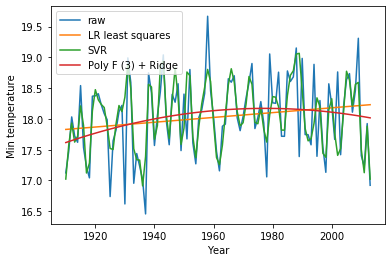

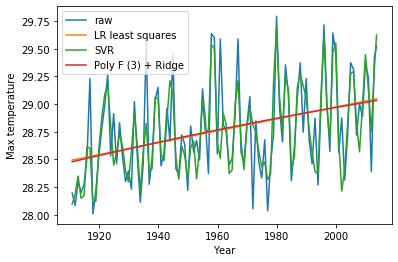

In [83]:
def testModel(data_out, labelX, labelY, filename, appendToLastPlot=False, doBay=False, doSvr=True, doPoly=True):
    
    # future predictions
    # https://www.kaggle.com/saksham219/temperature-variation-over-the-years-in-new-delhi
    #data_out = out.resample('A').mean()
    #data_out = data_out.reset_index()
    x = data_out["Year"].values.reshape(-1,1)
    #x = data_out.index.values.reshape(-1,1)
    #print(x) 
    #obtaining values of temperature
    y = data_out['AverageTemperature'].values
    #print(y)
    
    # Using linear regression and finding accuracy of our prediction
    # http://scikit-learn.org/stable/auto_examples/svm/plot_svm_regression.html
    # http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols_ridge_variance.html
    #reg = Ridge()
    reg = LinearRegression()
    #reg = BayesianRidge()
    reg.fit(x,y)
    y_preds = reg.predict(x)
    # accuracy/variance R-squared valu (1 is perfect) # 0.294882742867
    print("Accuracy: ", reg.score(x,y))
    # The coefficients
    print('Coefficients: ', reg.coef_)
    # The mean squared error
    print("Mean squared error: ", np.mean((reg.predict(x) - y) ** 2))
    
    

    
    #plotting data along with regression
    if not appendToLastPlot:
        plt.figure()
    plt.plot(x, y, '-', markersize=1, label="raw")
    plt.plot(x, y_preds,'-', markersize=1, label="LR least squares")
    #plt.scatter(x=x, y=y_preds)
    #plt.scatter(x=x,y=y, c='r')
    
     # test predictions past/future of temperature
    print("Prediction 1917: ", reg.predict([[1917]]))
    print("Prediction 2017: ", reg.predict([[2017]]))
    print("Prediction 2117: ", reg.predict([[2117]]))
    #2020: 22.34
    


    
    # BayesianRidge
    #doBay = False
    if doBay:
        b = BayesianRidge(alpha_1=1.0, lambda_1=1.0, alpha_2=1.0, lambda_2=1.0)
        b.fit(x,y)
        y_preds_b = b.predict(x)
        plt.plot(x, y_preds_b, '-', markersize=1, label="bayridge")
        
    # Using SVM for prediction
    #doSvr = True
    if doSvr:
        #svr = SVR(kernel='poly', C=1e3, degree=2) #too slow
        #svr = SVR(kernel='rbf')#
        #svr = SVR(C=1000, epsilon=0.0001)
        svr = SVR(kernel = "rbf", C = 1e3, gamma = 0.1, epsilon = 0.1)
        #svr = SVR(kernel='poly', degree=2)#(kernel='linear') 'rbf'
        svr.fit(x,y)
        y_preds_svr = svr.predict(x)
        plt.plot(x, y_preds_svr,'-', markersize=1, label="SVR")
        
        print("SVR Accuracy: ", svr.score(x,y))
        print("SVR Prediction 1917: ", svr.predict([[1917]]))
        print("SVR Prediction 2017: ", svr.predict([[2017.0]]))
        print("SVR Prediction 2017b: ", svr.predict([[2017.5]]))
        print("SVR Prediction 2018: ", svr.predict([[2018.0]]))
        print("SVR Prediction 2018b: ", svr.predict([[2018.5]]))
        print("SVR Prediction 2117: ", svr.predict([[2117]]))
    

    # http://www.ritchieng.com/machine-learning-evaluate-linear-regression-model/
    # visualize the relationship between the features and the response using scatterplots
    #plt2 = sns.pairplot(data_out, x_vars=['Year'], y_vars='AverageTemperature', size=8, kind='reg')
    #plt2.savefig("output.png")
    
   
    
    # compare a prediction with an actual value
    #print("Actual 1967: ", data_out.loc[data_out['Year'] == 1967]['AverageTemperature'])
    

    # Using polynomial features with Ridge regression
    # in other words: instead of our straight least squares line from linear regression, apply the data to a curve
    # http://scikit-learn.org/stable/auto_examples/linear_model/plot_polynomial_interpolation.html#sphx-glr-auto-examples-linear-model-plot-polynomial-interpolation-py
    #x_plot = data_out["Year"].values.reshape(-1,1)
    #doPoly = True
    if doPoly:
        model = make_pipeline(PolynomialFeatures(degree=2), Ridge(alpha=1.0))
        model.fit(x, y)
        y_preds2 = model.predict(x)
        plt.plot(x, y_preds2, '-', markersize=1, label="Poly F (3) + Ridge")
        # todo: need to score the poly/ridge model
        print("Accuracy: ", model.score(x,y))
        
        # test predicitons - terrible with 6 features
        print("Prediction 1917: ", model.predict([[1917]]))
        print("Prediction 2017: ", model.predict([[2017]]))
        print("Prediction 2117: ", model.predict([[2117]]))
        
        # winter vs summer prediction? incorrect!
        print("Prediction 2017 summer: ", model.predict([[2017.0]]))
        print("Prediction 2017 winter: ", model.predict([[2017.5]]))
        
    
    # image must be saved last
    if not appendToLastPlot:
        plt.ylabel(labelY)#('Temperature')
        plt.xlabel(labelX)#('Year')
        plt.legend(loc='upper left')
    #plt.ylim([10,25])
    #plt.savefig("future.png")
    plt.savefig(filename)
    #"future.png")
    print(filename)
    
    
# run the tests / save the plots
# raw, year mean, 10 year mean, min, max
testModel(out, "Year", "Raw temperature", "raw.png")
testModel(out.resample('A').mean(), "Year", "Mean temperature", "mean.png")
testModel(out.resample('10A').mean(), "Year", "10 year mean temperature", "10-mean.png")
testModel(out.resample('A').min(), "Year", "Min temperature", "min.png")
testModel(out.resample('A').max(), "Year", "Max temperature", "max.png")


# Experiments for paper

In [32]:
pd.options.display.max_rows = 500


: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.



In [46]:
out.resample('10A').mean()

,AverageTemperature,Year,Month,Days delta,Season,MA,Season offset
dt,,,,,,,
1910-12-31,24.532833,1910.458333,6.500000,166.500000,1.500000,24.532833,-6.672833
1920-12-31,24.723983,1915.958333,6.500000,2175.450000,1.500000,24.704563,0.019420
1930-12-31,24.858433,1925.958333,6.500000,5827.966667,1.500000,24.868769,-0.010335
1940-12-31,24.970408,1935.958333,6.500000,9480.450000,1.500000,24.948887,0.021522
1950-12-31,25.011033,1945.958333,6.500000,13132.966667,1.500000,25.021337,-0.010303
1960-12-31,25.264858,1955.958333,6.500000,16785.450000,1.500000,25.246910,0.017949
1970-12-31,25.140950,1965.958333,6.500000,20437.966667,1.500000,25.154039,-0.013089
1980-12-31,25.156750,1975.958333,6.500000,24090.450000,1.500000,25.144563,0.012187
1990-12-31,25.288542,1985.958333,6.500000,27742.966667,1.500000,25.288510,0.000031


In [49]:
for a in [round(x, 2) for x in list(out.resample('10A').mean()['AverageTemperature'])]:
    print(a)

24.53
24.72
24.86
24.97
25.01
25.26
25.14
25.16
25.29
25.26
25.53
25.61


In [80]:
out.resample('A').max().tail()

,AverageTemperature,Year,Month,Days delta,Season,MA,Season offset
dt,,,,,,,
2009-12-31,29.375,2009.916667,12,36494,3,26.004917,3.548000
2010-12-31,29.238,2010.916667,12,36859,3,25.940333,3.443583
2011-12-31,28.389,2011.916667,12,37224,3,25.925583,3.073417
2012-12-31,29.416,2012.916667,12,37590,3,25.627500,3.962083
2013-12-31,29.524,2013.666667,9,37864,3,25.490333,4.106333


Accuracy:  0.0038970502187856133
Coefficients:  [0.00785625]
----------------------------------
25.62
25.66
25.7
25.74
25.78
25.82
25.86
25.9
25.94
25.98
26.02
26.06
26.1
26.13
26.17
26.21
26.25
26.29
26.33
26.37
Fitting the SVR model-------------------
@@@@ Mean squared error of Plynomial regression:  1.2473
SVR Accuracy:  -0.08390251698255602
SVR Prediction 1917:  [24.29430151]
SVR Prediction 2017:  [27.85558611]
SVR Prediction 2017b:  [27.87384876]
SVR Prediction 2018:  [27.89211288]
SVR Prediction 2018b:  [27.91038475]
SVR Prediction 2117:  [31.59792272]
Accuracy:  0.004286584602259835
Prediction 1917:  [24.71234572]
Prediction 2017:  [25.84515379]
Prediction 2117:  [40.07060244]
Prediction 2017 summer:  [25.84515379]
Prediction 2017 winter:  [25.8630089]
raw.png
Accuracy:  0.490351844880923
Coefficients:  [0.00777769]
----------------------------------
25.62
25.66
25.7
25.74
25.78
25.82
25.85
25.89
25.93
25.97
26.01
26.05
26.09
26.13
26.17
26.2
26.24
26.28
26.32
26.36
Fitting the 

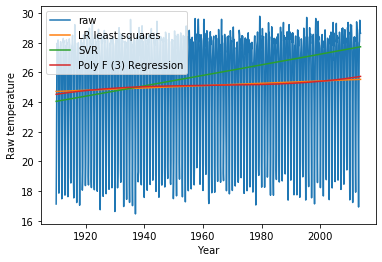

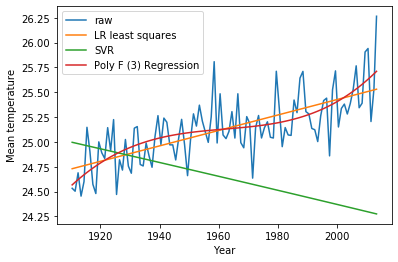

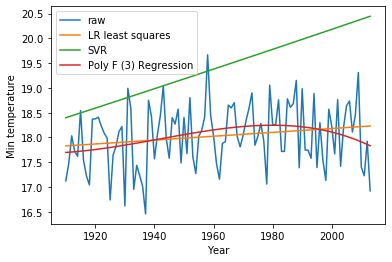

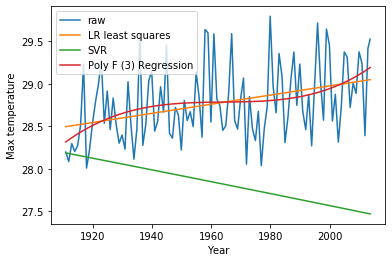

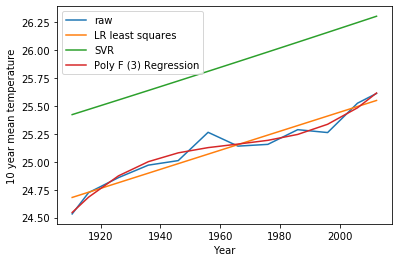

In [78]:
def testModel(data_out, labelX, labelY, filename, appendToLastPlot=False, doBay=False, doSvr=True, doPoly=True):
    
    # future predictions
    # https://www.kaggle.com/saksham219/temperature-variation-over-the-years-in-new-delhi
    #data_out = out.resample('A').mean()
    #data_out = data_out.reset_index()
    x = data_out["Year"].values.reshape(-1,1)
    #x = data_out.index.values.reshape(-1,1)
    #print(x) 
    #obtaining values of temperature
    y = data_out['AverageTemperature'].values
    #print(y)
    
    # Using linear regression and finding accuracy of our prediction
    # http://scikit-learn.org/stable/auto_examples/svm/plot_svm_regression.html
    # http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols_ridge_variance.html
    #reg = Ridge()
    reg = LinearRegression()
    #reg = BayesianRidge()
    reg.fit(x,y)
    y_preds = reg.predict(x)
    # accuracy/variance R-squared valu (1 is perfect) # 0.294882742867
    print("Accuracy: ", reg.score(x,y))
    # The coefficients
    print('Coefficients: ', reg.coef_)
    # The mean squared error
    # print("Mean squared error of Linear regression: ", np.mean((reg.predict(x) - y) ** 2))
    
    print("----------------------------------")
    for i in range(2025, 2121, 5):
        print(round(reg.predict([[i]])[0], 2))
    
    

    
    #plotting data along with regression
    if not appendToLastPlot:
        plt.figure()
    plt.plot(x, y, '-', markersize=1, label="raw")
    plt.plot(x, y_preds,'-', markersize=1, label="LR least squares")
    #plt.scatter(x=x, y=y_preds)
    #plt.scatter(x=x,y=y, c='r')
    
     # test predictions past/future of temperature
#     print("Prediction 1917: ", reg.predict([[1917]]))
#     print("Prediction 2017: ", reg.predict([[2017]]))
#     print("Prediction 2117: ", reg.predict([[2117]]))
    #2020: 22.34
    


    
    # BayesianRidge
#     #doBay = False
#     if doBay:
#         b = BayesianRidge(alpha_1=1.0, lambda_1=1.0, alpha_2=1.0, lambda_2=1.0)
#         b.fit(x,y)
#         y_preds_b = b.predict(x)
#         plt.plot(x, y_preds_b, '-', markersize=1, label="bayridge")
        
    # Using SVM for prediction
    doSvr = True
    if doSvr:
        # svr = SVR(kernel='poly', C=1e3, degree=2) #too slow
        #svr = SVR(kernel='rbf')#
        #svr = SVR(C=1000, epsilon=0.0001)
        # svr = SVR(kernel = "rbf", C = 1e3, gamma = 0.1, epsilon = 0.1)
        svr = SVR(kernel='poly', degree=2)#(kernel='linear') 'rbf'
        print('Fitting the SVR model-------------------')
        svr.fit(x,y)
        
        model = svr

        
        y_preds_svr = svr.predict(x)
        # print("Mean squared error: ", np.mean((reg.predict(x) -y_preds_svr) ** 2))
        print("@@@@ Mean squared error of Plynomial regression: ", round(np.mean((reg.predict(x) - y_preds_svr) ** 2), 4))

        plt.plot(x, y_preds_svr,'-', markersize=1, label="SVR")
        
        print("SVR Accuracy: ", svr.score(x,y))
        print("SVR Prediction 1917: ", svr.predict([[1917]]))
        print("SVR Prediction 2017: ", svr.predict([[2017.0]]))
        print("SVR Prediction 2017b: ", svr.predict([[2017.5]]))
        print("SVR Prediction 2018: ", svr.predict([[2018.0]]))
        print("SVR Prediction 2018b: ", svr.predict([[2018.5]]))
        print("SVR Prediction 2117: ", svr.predict([[2117]]))
    

    # http://www.ritchieng.com/machine-learning-evaluate-linear-regression-model/
    # visualize the relationship between the features and the response using scatterplots
    #plt2 = sns.pairplot(data_out, x_vars=['Year'], y_vars='AverageTemperature', size=8, kind='reg')
    #plt2.savefig("output.png")
    
   
    
    # compare a prediction with an actual value
    #print("Actual 1967: ", data_out.loc[data_out['Year'] == 1967]['AverageTemperature'])
    

    # Using polynomial features with Ridge regression
    # in other words: instead of our straight least squares line from linear regression, apply the data to a curve
    # http://scikit-learn.org/stable/auto_examples/linear_model/plot_polynomial_interpolation.html#sphx-glr-auto-examples-linear-model-plot-polynomial-interpolation-py
    #x_plot = data_out["Year"].values.reshape(-1,1)
    doPoly = True
    if doPoly:
        model = make_pipeline(PolynomialFeatures(degree=5), LinearRegression())
        model.fit(x, y)
        y_preds2 = model.predict(x)
        plt.plot(x, y_preds2, '-', markersize=1, label="Poly F (3) Regression")
        # todo: need to score the poly/ridge model
        print("Accuracy: ", model.score(x,y))

        
        # test predicitons - terrible with 6 features
        print("Prediction 1917: ", model.predict([[1917]]))
        print("Prediction 2017: ", model.predict([[2017]]))
        print("Prediction 2117: ", model.predict([[2117]]))
        
        # winter vs summer prediction? incorrect!
        print("Prediction 2017 summer: ", model.predict([[2017.0]]))
        print("Prediction 2017 winter: ", model.predict([[2017.5]]))
        

        
    
    # image must be saved last
    if not appendToLastPlot:
        plt.ylabel(labelY)#('Temperature')
        plt.xlabel(labelX)#('Year')
        plt.legend(loc='upper left')
    #plt.ylim([10,25])
    #plt.savefig("future.png")
    plt.savefig(filename)
    #"future.png")
    print(filename)
    
    
# run the tests / save the plots
# raw, year mean, 10 year mean, min, max
testModel(out, "Year", "Raw temperature", "raw.png")
testModel(out.resample('A').mean(), "Year", "Mean temperature", "mean.png")
testModel(out.resample('A').min(), "Year", "Min temperature", "min.png")
testModel(out.resample('A').max(), "Year", "Max temperature", "max.png")
testModel(out.resample('10A').mean(), "Year", "10 year mean temperature", "10-mean.png")
